In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/Kaushik/Downloads/telecom_churn_data.csv", names=['State', 'Account Length', 'Area code', 'Phone', 'International Plan', 'VMail plan', 'VMail Message' ,'Day mins', 'Day calls', 'Day charge', 'Eve mins', 'Eve calls', 'Eve charge', ' Night mins', 'Night calls', 'Night charge', 'Intl mins', 'Intl calls', 'Intls charge', 'Custserv calls', 'Churn'])

In [3]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()



In [5]:
data['Churn']=lc.fit_transform(data['Churn'])

In [6]:
data.head(20)

,State,Account Length,Area code,Phone,International Plan,VMail plan,VMail Message,Day mins,Day calls,Day charge,...,Eve calls,Eve charge,Night mins,Night calls,Night charge,Intl mins,Intl calls,Intls charge,Custserv calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                 4617 non-null object
Account Length        4617 non-null int64
Area code             4617 non-null int64
Phone                 4617 non-null object
International Plan    4617 non-null object
VMail plan            4617 non-null object
VMail Message         4617 non-null int64
Day mins              4617 non-null float64
Day calls             4617 non-null int64
Day charge            4617 non-null float64
Eve mins              4617 non-null float64
Eve calls             4617 non-null int64
Eve charge            4617 non-null float64
 Night mins           4617 non-null float64
Night calls           4617 non-null int64
Night charge          4617 non-null float64
Intl mins             4617 non-null float64
Intl calls            4617 non-null int64
Intls charge          4617 non-null float64
Custserv calls        4617 non-null int64
Churn                 4617 non-nu

In [7]:
data['ChurnFlag']=(data['Churn']==True).astype(int)

In [8]:
data.head(20)

,State,Account Length,Area code,Phone,International Plan,VMail plan,VMail Message,Day mins,Day calls,Day charge,...,Eve charge,Night mins,Night calls,Night charge,Intl mins,Intl calls,Intls charge,Custserv calls,Churn,ChurnFlag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,0,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,0,0


In [9]:
X=data.iloc[:,6:19]
y=data.iloc[:,21]

In [23]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=100)

In [24]:
model=LogisticRegression()

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [27]:
model.fit(X_train,y_train)

C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predict=model.predict(X_test)

In [29]:
accuracy_score(y_test, predict)

0.8759018759018758

In [30]:
confusion_matrix(y_test, predict)

array([[1205,    0],
       [ 172,    9]], dtype=int64)

In [31]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1205
           1       1.00      0.05      0.09       181

    accuracy                           0.88      1386
   macro avg       0.94      0.52      0.51      1386
weighted avg       0.89      0.88      0.82      1386



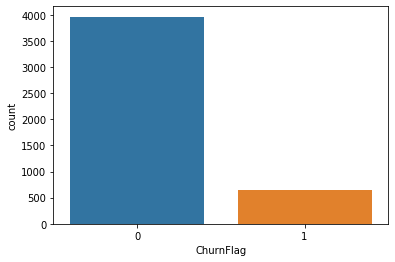

In [32]:
sb.countplot(x='ChurnFlag', data=data)